Apologies for all the formatting issues. LaTeX and Jupyter are individually great; together, not so much. Also, sorry for the python code snippets still littering this report; hopefully, they won't be too distracting.


If there's a chart, table, or calculation you want to see, or if you have any questions, please let me know: adam.swenson@csun.edu


All the code used to calculate these results can be found here: https://github.com/AdamSwenson/csun-election-management Though be forewarned: It's a rather messy codebase. I quickly ported last year's project for doing elections with Canvas and haven't had a chance to refactor. Questions and pull-requests (hint hint) are very welcome! 

Finally, here's some election-related terminology which may help interpret the results:


**Abstention**: The ballot expresses no preference, i.e., it is blank.


**Legal**: The ballot expresses a preference which can be satisfied within the bounds of the election


**Illegal**: The ballot expresses a preference which cannot be satisfied within the bounds of the election.
        
        In this election, this could involve:    
        - The voter writing-in a name which they also selected.
      
        Back when we conducted the election via Canvas, we also had to worry about:
        - The voter selecting more than the allowed number of candidates 
        - Selecting the maximum number and then writing in an additional candidate.


**Cast** = abstentions + legal + illegal
    
    - Cast plays no role except for auditing 


**Valid** = legal + illegal
    
    - These determine the denominator when a position requires a majority (i.e., > 50%)
    
    - Note that abstentions do not count in the denominator

# Load and process data

In [1]:
%cd ~/Dropbox/csun-election-management
YEAR =2019

#Plotting 
%matplotlib inline
from matplotlib import pyplot as plt
# %config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'png'

import seaborn as sns
sns.set_style("whitegrid") #, {"lines.linewidth": 2.5, "font_scale": 1.5})
sns.set_context("talk")
# sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
#Base Classes stuff
from FileSystemTools import *
from UtilityDecorators import *
from UtilityFunctions import *

import pandas as pd
from pandas import DataFrame, Series
import numpy as np

import counter.environment as env
from counter.QualitricsHelpers import get_results_column_names, get_write_in_column_names
from counter.QualitricsProcessors import process_results, save_results, process_field, process_voter, process_office_columns
from counter.FileSystemTools import makeDataFileList
# String processing of result cells
from counter.StringProcessors import find_dept, remove_depts

import counter.PresentationHelpers as PH

from counter.QualitricsHelpers import load_and_prepare

/Users/adam/Dropbox/csun-election-management


## Load from results files

In [2]:
general_results_file = "{}/general-{}.csv".format(env.RESULTS_FOLDER_PATH, YEAR)
sc_results_file = "{}/standing-committees-{}.csv".format(env.RESULTS_FOLDER_PATH, YEAR)
general_definition_file = "{}/general-definition-{}.xlsx".format(env.DEFINITIONS_FOLDER_PATH, YEAR)
sc_definition_file = "{}/standing-committees-definition-{}.xlsx".format(env.DEFINITIONS_FOLDER_PATH, YEAR)

general_data = load_and_prepare(general_results_file)
sc_data = load_and_prepare(sc_results_file)

## Process the data; save to excel files

In [3]:
general_results = process_results(general_data, general_definition_file, 'general')
save_results("{}/general-results-{}.xlsx".format(env.OUTPUT_FOLDER_PATH, YEAR), general_results)
sc_results = process_results(sc_data, sc_definition_file, 'committees')
save_results("{}/standing-committee-results-{}.xlsx".format(env.OUTPUT_FOLDER_PATH, YEAR), sc_results)

# General election results

## Vote counts and percentage of total valid votes

NB, Officers of the Faculty and the Statewide Senator must be elected by a majority of votes. Thus for these offices we need a run off if 'pct_of_valid' is not greater than %50 for one candidate. 

I've nonetheless included the percentage of valid votes for all other offices in case it is of interest.

In [4]:
PH.show_results_tables(general_results)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Visualized

Here's the results data in chart form. The plots in the column on the right are unnecessary for senators-at-large.

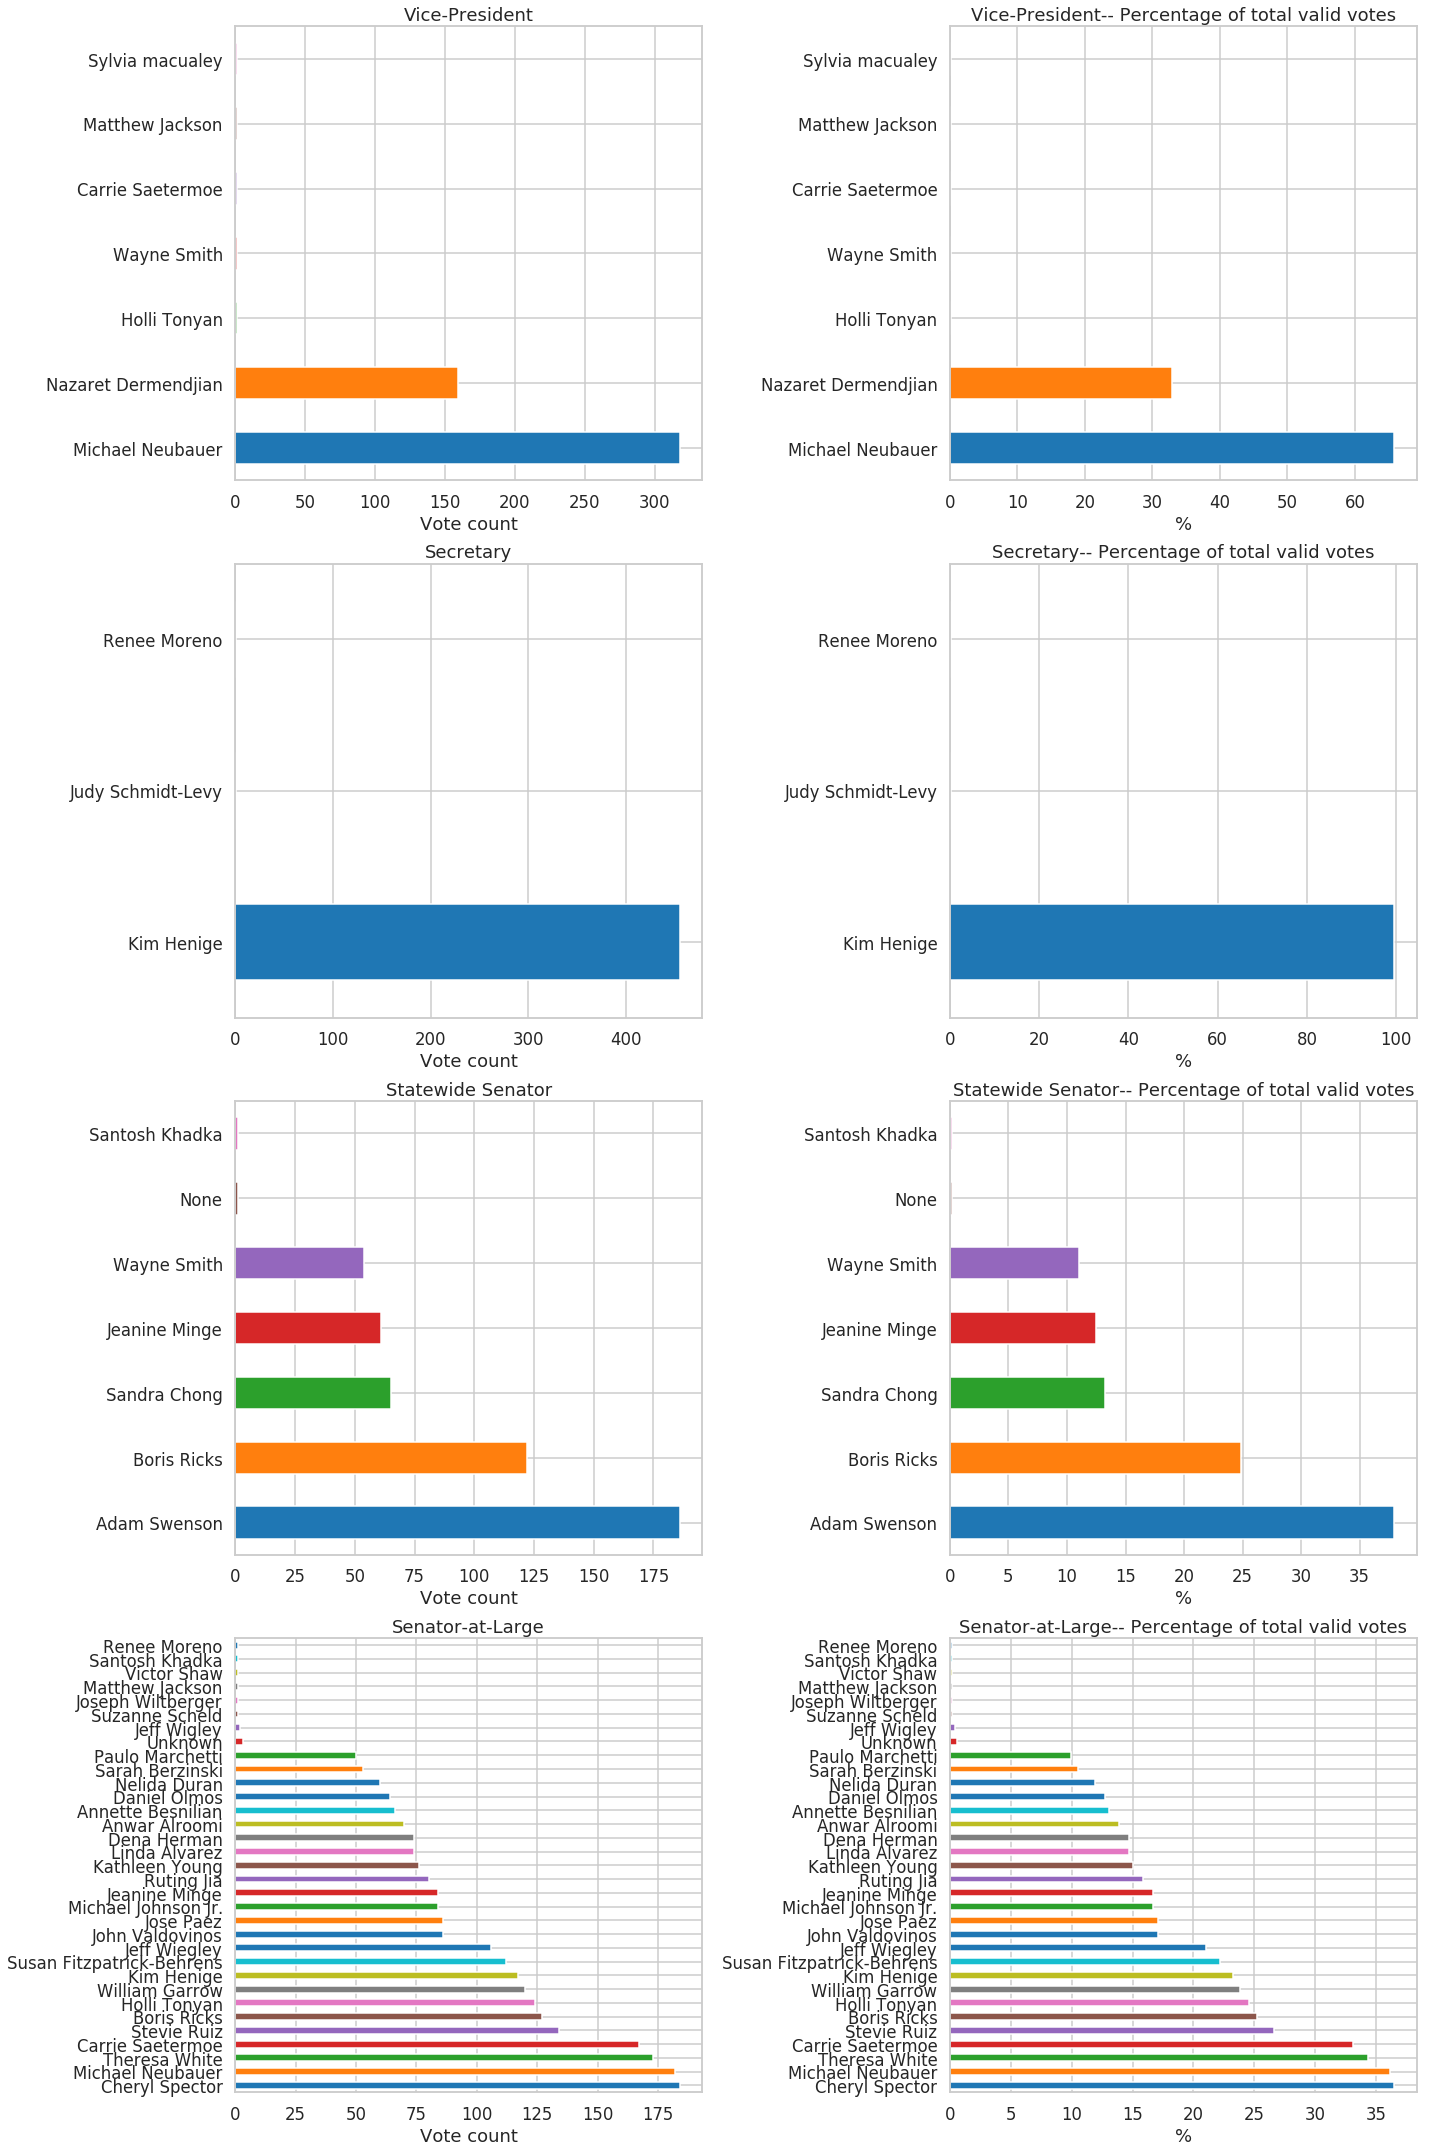

In [5]:
PH.plot_results(general_results, (20, 30))

# Standing committees

## Vote counts and percentage of total valid votes

I've included the percentage of valid votes for all other offices in case it is of interest. For standing committees, there's no requirement that anyone receive any particular percentage.

In [6]:
PH.show_results_tables(sc_results)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Visualized

In [7]:
# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

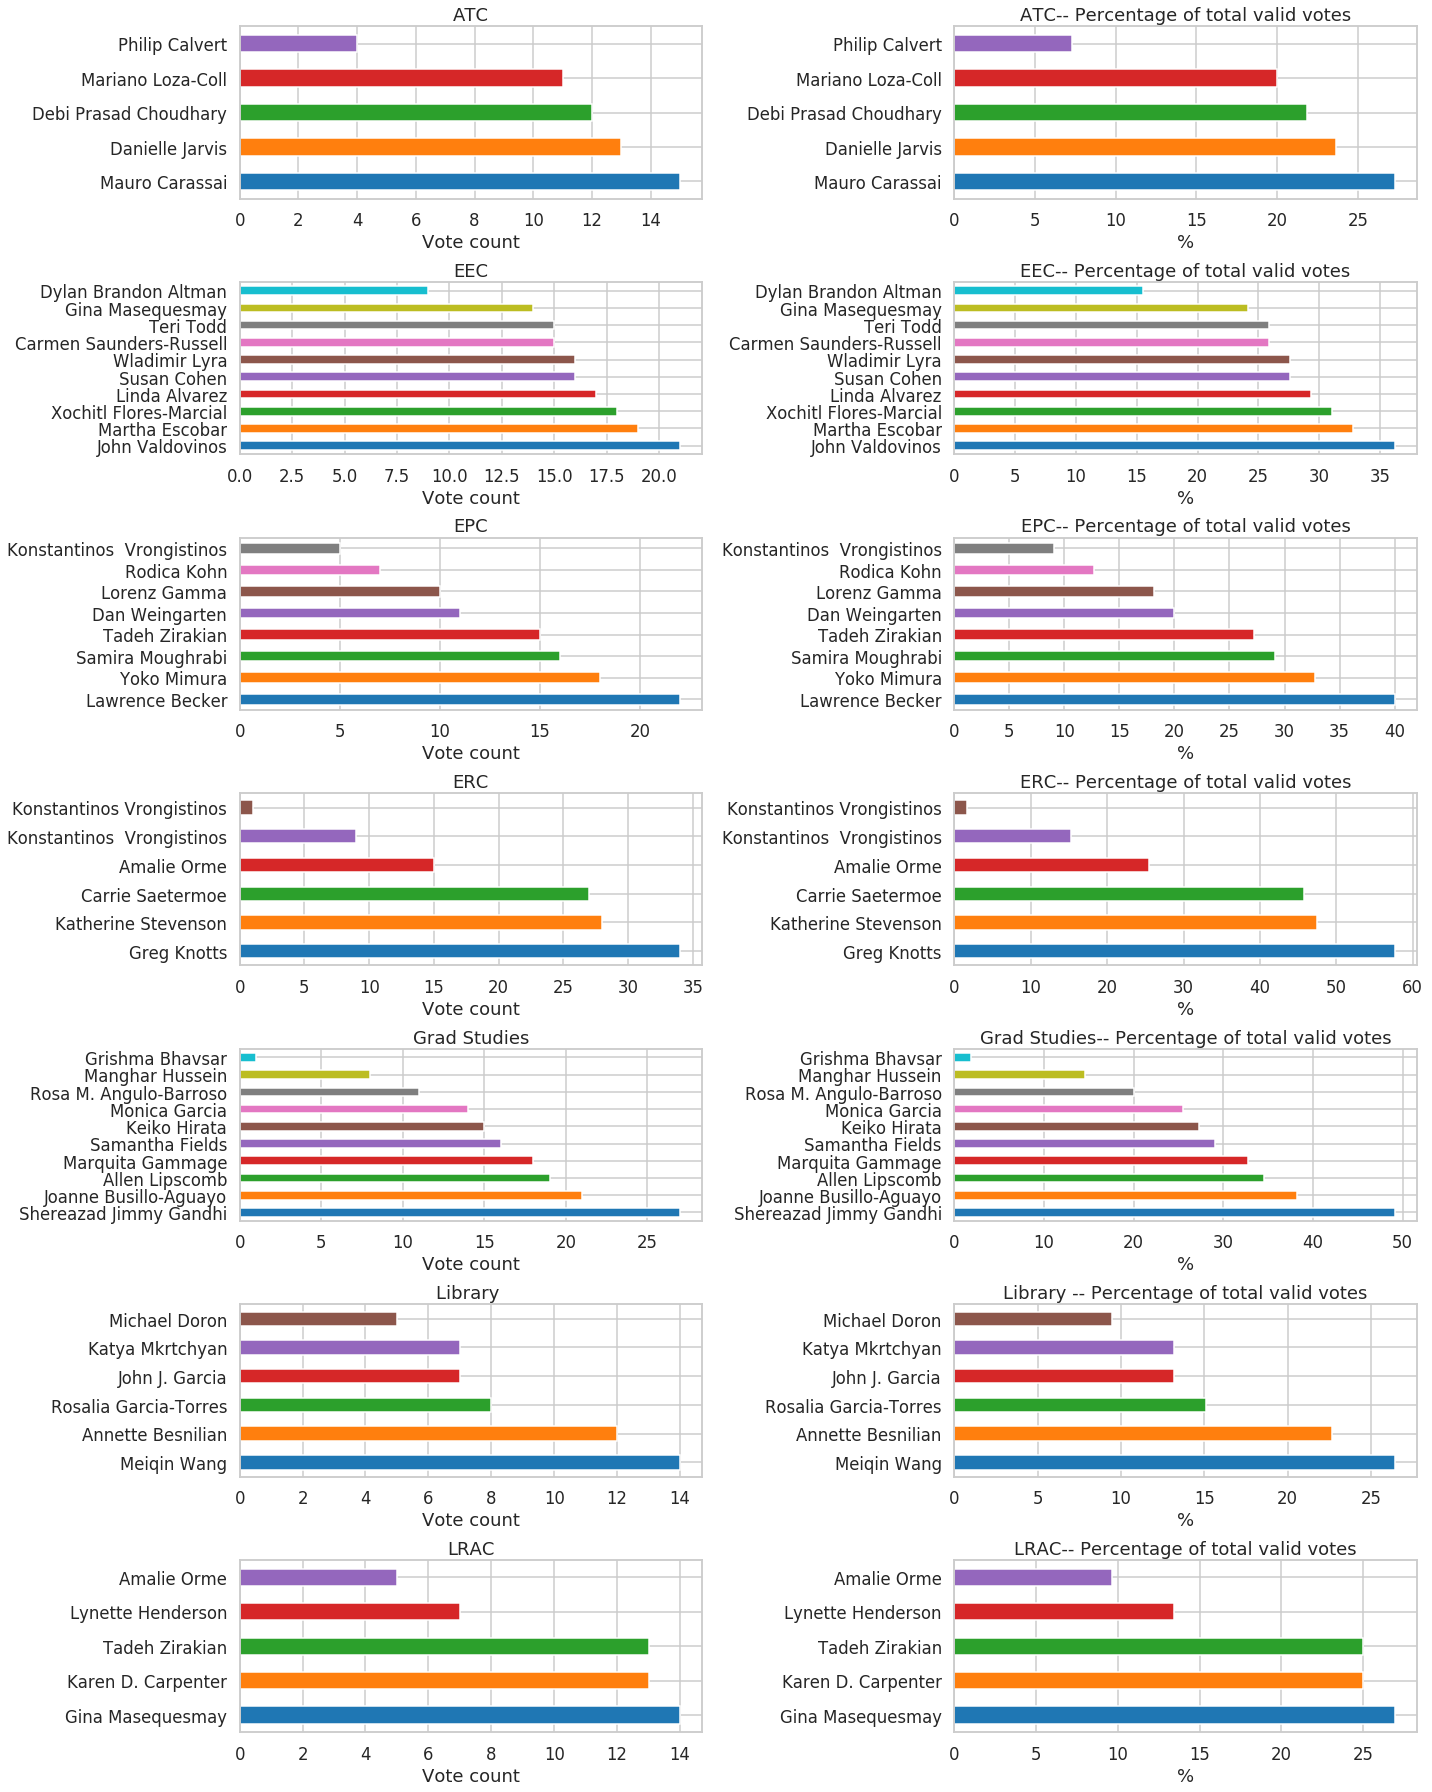

In [8]:
PH.plot_results(sc_results, (20, 25))

For the ERC election, note that Dino's name had 2 spaces in between his first and last name on the ballot. The folks who chose to write his name in rather than selecting it added 1 space, thus my program didn't combine them.


# Abstentions

For completeness, it's worth looking briefly at abstentions. Those on the Senate know my militant view on abstentions. Holes are privations of dirt. Abstentions are privations of votes.^. 

This fits with the Robert's Rules treatment of abstentions, which governs our elections: only ballots which indicate a preference count toward vote totals. Writing in 'Anyone but these yahoos' expresses a preference. A blank ballot expresses the absence of a preference. Therefore, abstentions do not count in the denominator for offices which require the winner to obtain a majority.

There's not much to be learned from the amount of abstentions ---we cannot infer that voters hated all the candidates since it could've been that they loved them all equally.^^ But, here they are for completeness...


^ Technically, they exist but do not subsist


^^ For arguments that it isn't always rational to flip a coin in these cases, see (my former teacher) Ruth Chang's work on incommensurable values

## General election abstentions

In [9]:
PH.show_abstentions_tables(general_results)

<IPython.core.display.Latex object>

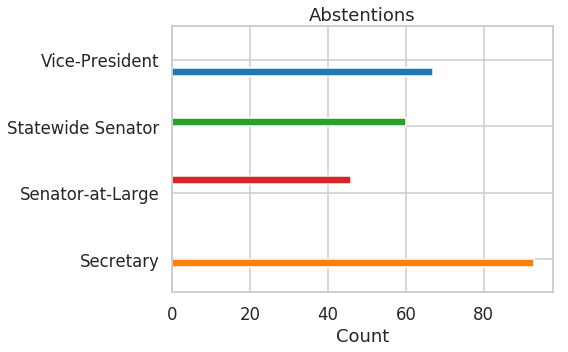

In [10]:
PH.plot_abstentions(general_results)

## Standing committee abstentions

In [11]:
PH.show_abstentions_tables(sc_results)

<IPython.core.display.Latex object>

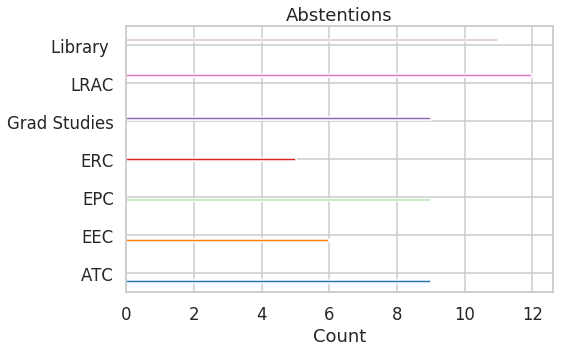

In [12]:
PH.plot_abstentions(sc_results)

# General properties of the election(s)

Note that this year's election was several days shorter than previous elections.

## General election

In [13]:
# calculate returns for general
general_returns = PH.load_past_returns('general')
gd = general_data.set_index('RecordedDate')
general_returns = PH.update_returns(gd, 'general', YEAR)
general_returns.drop(columns=['Final', 'Eligible', '%Eligible'], inplace=True)
general_returns.dropna(axis=1, how='all', inplace=True)

# calculate returns for committees
sc_returns = PH.load_past_returns('senate')
sd = sc_data.set_index('RecordedDate')
sc_returns = PH.update_returns(sd, 'senate', YEAR)
sc_returns.drop(columns=['Final', 'Eligible', '%Eligible'], inplace=True)
sc_returns.dropna(axis=1, how='all', inplace=True)

# calculate the proportion of eligible voters for each day in the election
eligible = PH.load_eligibility()
sc_returns_proport = sc_returns.apply(lambda x : PH.calc_proport_of_eligible(eligible['standing_committees'], x.index, x))
general_returns_proport = general_returns.apply(lambda x : PH.calc_proport_of_eligible(eligible['general'], x.index, x))

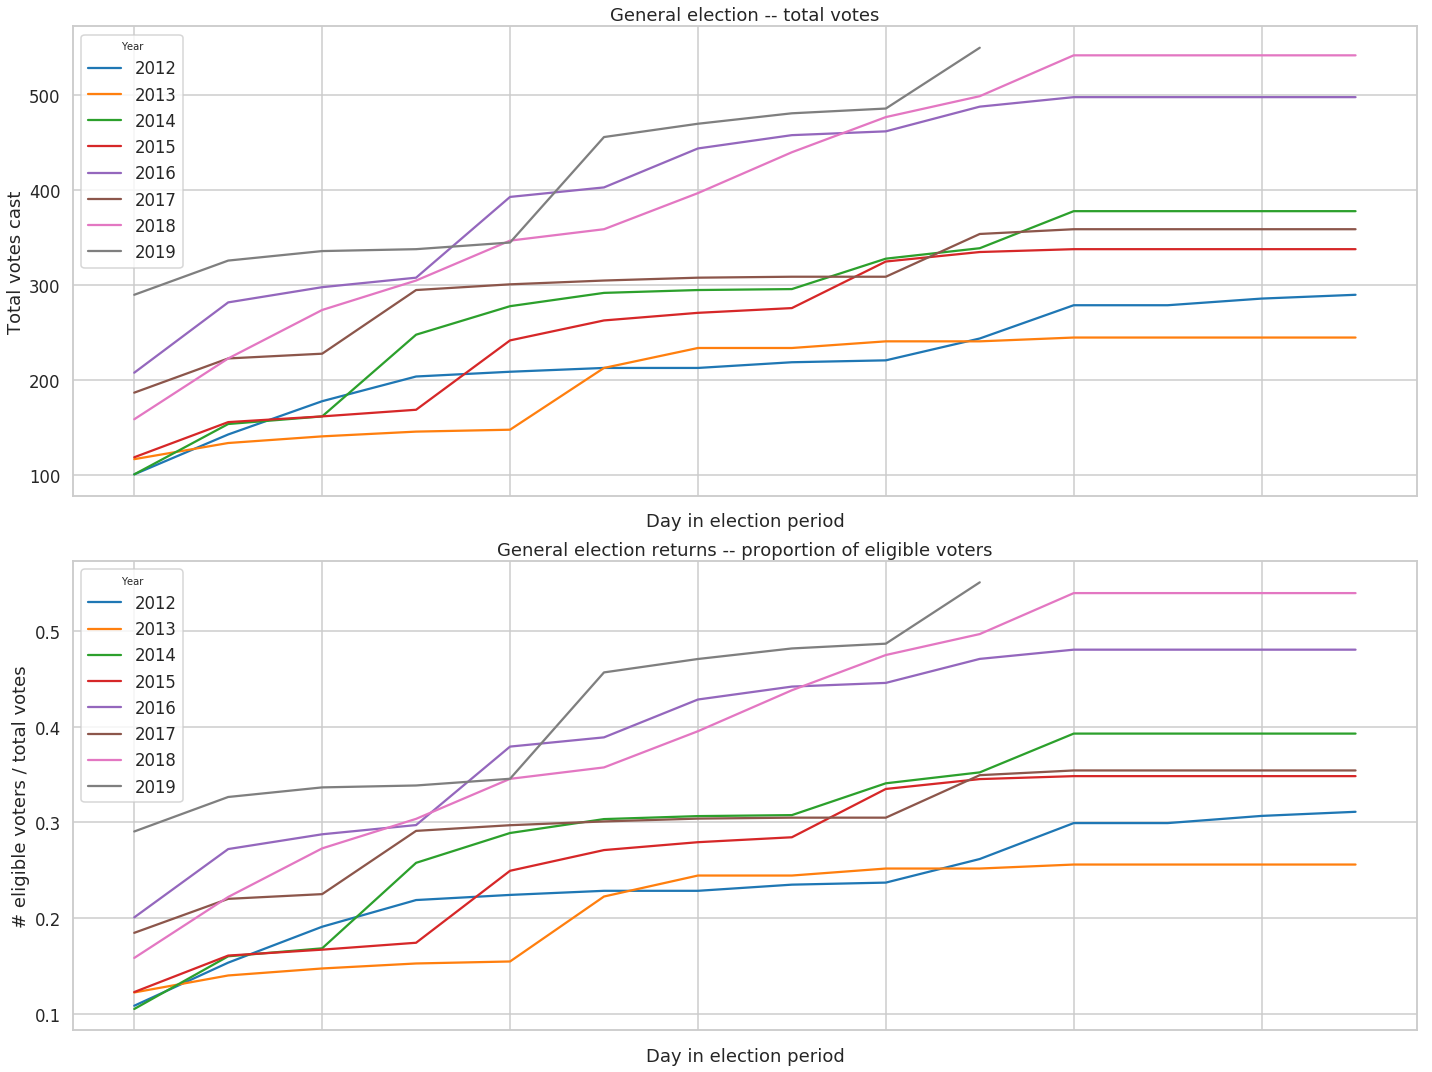

In [14]:
PH.plot_returns(general_returns, general_returns_proport, 'General', figsize=(20, 15) )

### Daily marginal votes cast

In [15]:
PH.show_daily_marginal_table(general_data)

<IPython.core.display.Latex object>

### Daily cumulative votes cast

In [16]:
PH.show_table(general_returns.T)

<IPython.core.display.Latex object>

### Daily cumulative proportion of total eligible voters

In [17]:
PH.show_table(general_returns_proport.T)

<IPython.core.display.Latex object>

## Standing committees election

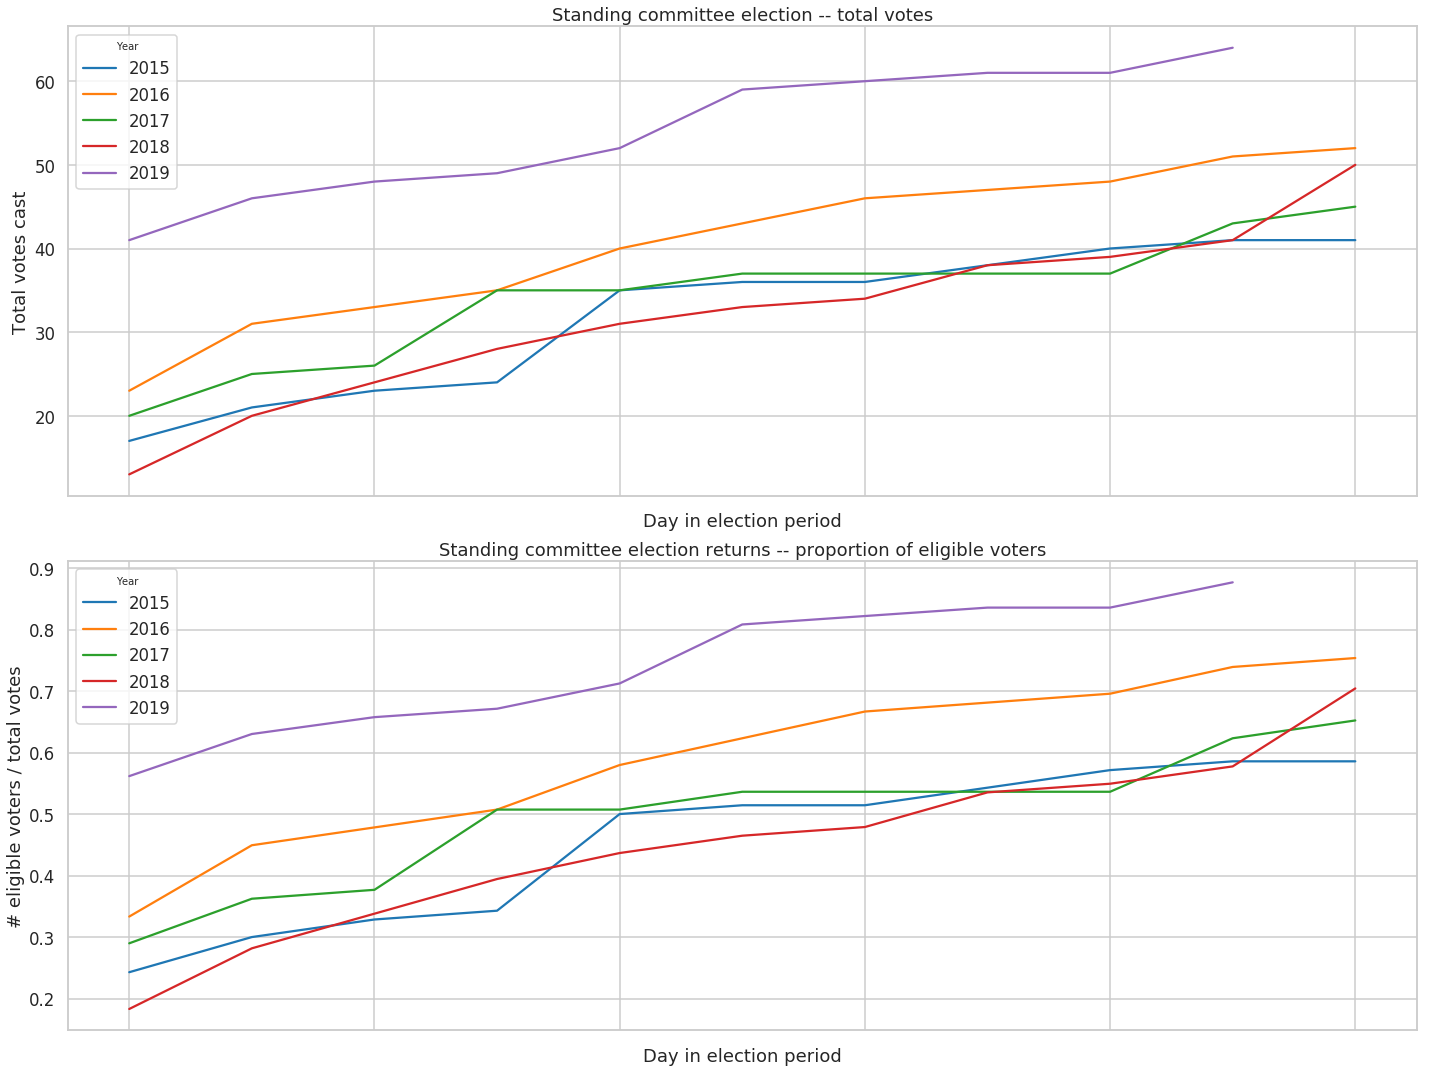

In [18]:
PH.plot_returns(sc_returns, sc_returns_proport, 'Standing committee', figsize=(20, 15))

### Daily marginal votes cast

In [19]:
PH.show_daily_marginal_table(sc_data)

<IPython.core.display.Latex object>

### Daily cumulative votes cast

In [20]:
PH.show_table(sc_returns.T)

<IPython.core.display.Latex object>

### Daily cumulative proportion of total eligible voters

In [21]:
PH.show_table(sc_returns_proport.T)

<IPython.core.display.Latex object>